#IDO1

## IMPORT LIBRARY

In [ ]:
!pip install sweetviz
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


%matplotlib inline

## Pengaturan Plot

In [ ]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 23
plt.rcParams['figure.titlesize'] = 26
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
sns.set_style('ticks')

## Baca Data

In [ ]:
csv_file='/content/IDO1.csv'
df = pd.read_csv(csv_file,index_col=0)

In [ ]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,norm_value,pIC50
0,CHEMBL584991,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1,46.0,active,271.639,1.6922,3.0,6.0,46.0,7.337242
1,CHEMBL584991,Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1,1000.0,active,271.639,1.6922,3.0,6.0,1000.0,6.000000
2,CHEMBL571436,Sc1nc(-c2ccccc2)cs1,20000.0,inactive,193.296,3.0988,1.0,3.0,20000.0,4.698970
7,CHEMBL449298,Nc1ccc(O)c2ncccc12,1000.0,active,201.269,3.3657,2.0,2.0,1000.0,6.000000
9,CHEMBL206816,Oc1ccc(O)c2ccccc12,10000.0,inactive,452.598,6.5876,0.0,4.0,10000.0,5.000000


In [ ]:
# Periksa nilai NaN pada semua kolom
print(df.isnull().sum())


molecule_chembl_id    25
canonical_smiles      25
standard_value        25
bioactivity_class     25
MW                    21
LogP                  21
NumHDonors            21
NumHAcceptors         21
norm_value            25
pIC50                 25
dtype: int64


In [ ]:
# Hapus semua baris yang memiliki nilai NaN di salah satu kolom
df = df.dropna()

## EDA

In [ ]:
print("dimension of diabetes data: {}".format(df.shape))

dimension of diabetes data: (121, 10)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 158
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  121 non-null    object 
 1   canonical_smiles    121 non-null    object 
 2   standard_value      121 non-null    float64
 3   bioactivity_class   121 non-null    object 
 4   MW                  121 non-null    float64
 5   LogP                121 non-null    float64
 6   NumHDonors          121 non-null    float64
 7   NumHAcceptors       121 non-null    float64
 8   norm_value          121 non-null    float64
 9   pIC50               121 non-null    float64
dtypes: float64(7), object(3)
memory usage: 10.4+ KB


 * Dataset is small and well labeled. There are no null values present.
 * very suitable to supervised machine learning formulation.
 * This is a binary classification problem, where we have 2 classes in the target **(y)** (i.e.`'bioactivity_class'`) and the Lipinski Molecular descriptors (i.e. `MW`,`LogP`,`NumHDonors` and `NumHAcceptors` can be used as the feature (**X**).

In [ ]:
selection = ['MW','LogP','NumHDonors','NumHAcceptors','bioactivity_class']
df = df[selection]

## Pairplot Fitur Data

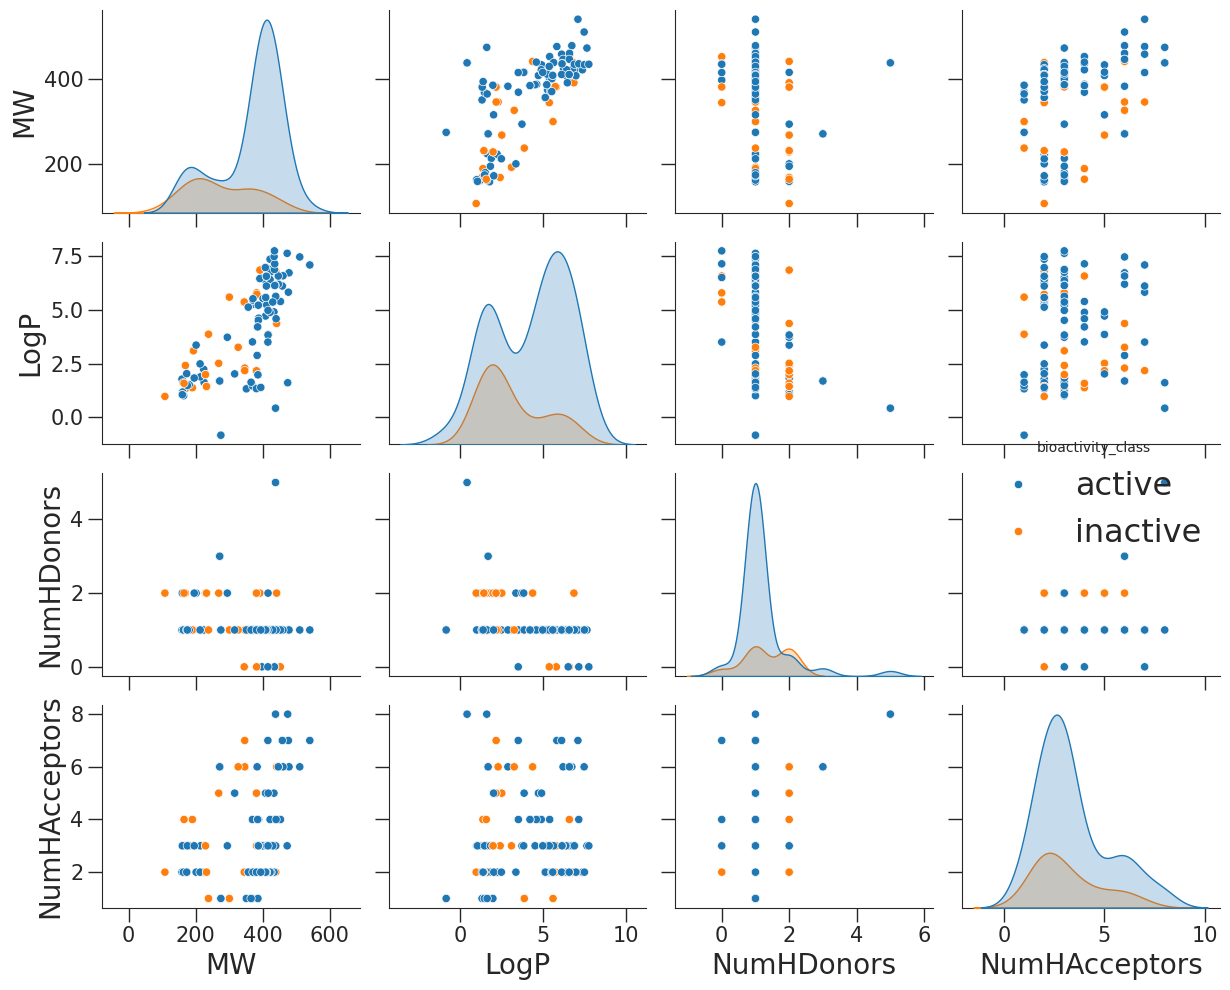

In [ ]:
selection = ['bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors']
sns.pairplot(df[selection], hue='bioactivity_class')
plt.tight_layout()

Analisis pasangan plot ini menunjukkan distribusi dan hubungan antar variabel deskriptor molekuler Lipinski berdasarkan kelas bioaktivitas (aktif dan tidak aktif):

1. **Variabel MW (Molecular Weight)**:
   - Distribusi MW untuk senyawa aktif dan tidak aktif tampak berbeda.
   - Senyawa aktif cenderung memiliki MW yang lebih rendah dibandingkan senyawa tidak aktif.
   - Terdapat korelasi positif antara MW dan LogP.

2. **Variabel LogP (Lipofilisitas)**:
   - Distribusi LogP menunjukkan senyawa aktif memiliki nilai yang lebih tinggi dibandingkan senyawa tidak aktif, tetapi keduanya memiliki tumpang tindih yang signifikan.
   - Korelasi positif terlihat antara LogP dan MW.

3. **NumHDonors (Jumlah Donor Ikatan Hidrogen)**:
   - Jumlah donor ikatan hidrogen untuk kedua kelas sebagian besar terkonsentrasi di nilai rendah (0-2).
   - Distribusi NumHDonors kurang memberikan pemisahan yang jelas antara kelas aktif dan tidak aktif.

4. **NumHAcceptors (Jumlah Akseptor Ikatan Hidrogen)**:
   - Senyawa aktif memiliki nilai NumHAcceptors yang lebih tersebar, sementara senyawa tidak aktif lebih terkonsentrasi di nilai rendah.
   - Ada indikasi hubungan lemah antara NumHAcceptors dan MW, tetapi pola ini tidak terlalu signifikan.

5. **Pemisahan Kelas**:
   - Secara keseluruhan, variabel MW dan LogP memberikan pemisahan yang lebih baik dibandingkan NumHDonors dan NumHAcceptors.
   - Hal ini sejalan dengan analisis bahwa MW dan NumHDonors adalah fitur penting dalam prediksi bioaktivitas.



## CEK KORELASI

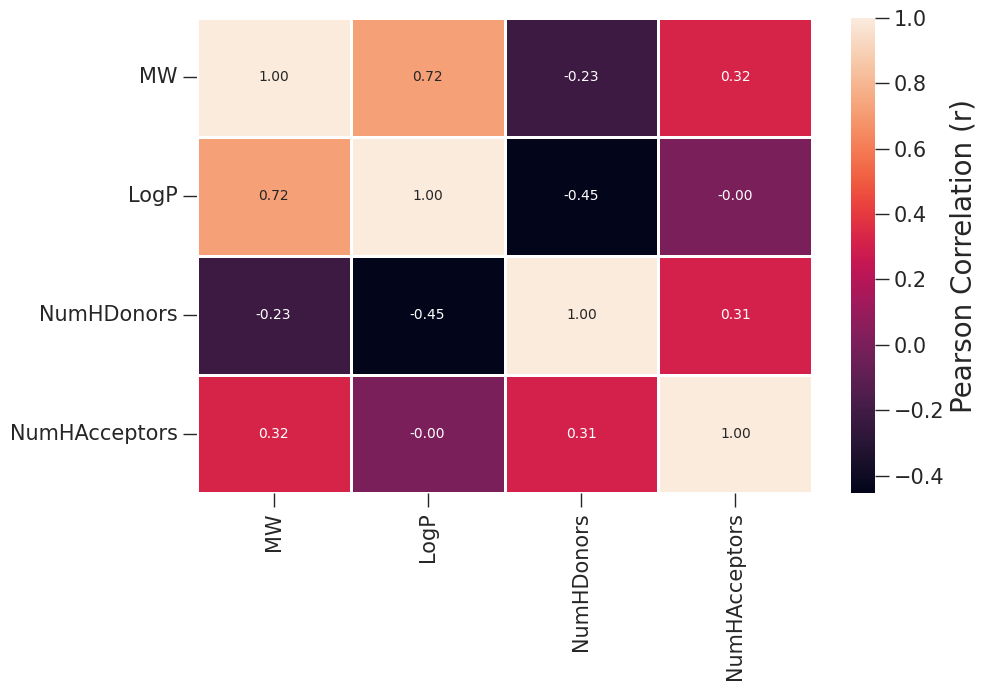

In [ ]:
plt.figure(figsize=(10,7))
corr_mat = df.iloc[:,:-1].corr()
sns.heatmap(corr_mat, fmt='0.2f', annot=True, lw=2, cbar_kws={'label':'Pearson Correlation (r)'})
plt.xticks(size=15,rotation=90)
plt.yticks(size=15,rotation=0)
plt.tight_layout()
plt.savefig('Correlation.png',dpi=300);

Berdasarkan heatmap korelasi Pearson yang diberikan, berikut adalah analisisnya:

 1. **Hubungan MW dan LogP**:
   - Korelasi positif yang tinggi (**r = 0.72**) menunjukkan bahwa molekul dengan berat molekul (MW) yang lebih tinggi cenderung memiliki nilai lipofilisitas (LogP) yang lebih besar.
   - Ini masuk akal karena molekul yang lebih besar sering memiliki lebih banyak rantai hidrokarbon yang meningkatkan lipofilisitas.

2. **Hubungan NumHDonors dengan MW dan LogP**:
   - **MW vs NumHDonors**: Korelasi lemah negatif (**r = -0.23**) menunjukkan bahwa berat molekul yang lebih besar tidak selalu terkait dengan jumlah donor ikatan hidrogen.
   - **LogP vs NumHDonors**: Korelasi negatif sedang (**r = -0.45**) mengindikasikan bahwa molekul dengan nilai LogP tinggi cenderung memiliki lebih sedikit donor ikatan hidrogen. Molekul lebih lipofilik biasanya memiliki lebih sedikit gugus polar.
 3. **Hubungan NumHAcceptors dengan MW dan LogP**:
   - **MW vs NumHAcceptors**: Korelasi positif lemah (**r = 0.32**) menunjukkan bahwa berat molekul yang lebih besar sedikit terkait dengan jumlah akseptor ikatan hidrogen.
   - **LogP vs NumHAcceptors**: Tidak ada hubungan signifikan (**r = -0.00**), yang berarti jumlah akseptor tidak memengaruhi lipofilisitas.

 4. **Hubungan antara NumHDonors dan NumHAcceptors**:
   - Korelasi positif sedang (**r = 0.31**) menunjukkan bahwa molekul dengan lebih banyak donor ikatan hidrogen cenderung memiliki lebih banyak akseptor, yang bisa terkait dengan keberadaan gugus polar seperti OH atau NH.

 5. **Pentingnya Fitur**:
   - Hubungan antara MW dan LogP yang tinggi menunjukkan bahwa kedua fitur ini saling berkaitan dan dapat memengaruhi klasifikasi bioaktivitas.
   - NumHDonors dan NumHAcceptors memberikan kontribusi independen yang lemah terhadap MW dan LogP, tetapi mungkin penting untuk memprediksi bioaktivitas.


## Distribusi Dataset

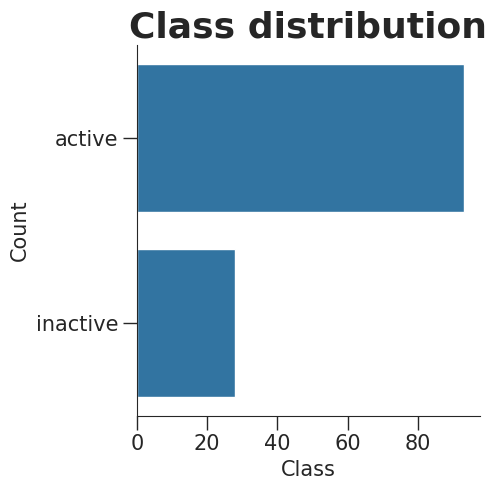

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df['bioactivity_class'],label='Count')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Count',size=15)
plt.xlabel('Class',size=15)
sns.despine(top=True)
plt.title('Class distribution',size=26, weight='bold')
plt.tight_layout()
plt.savefig('Class-distribution.png');

Berikut adalah analisis dari plot distribusi kelas:

1. **Distribusi Kelas**:
   - Kelas **aktif** memiliki jumlah sampel yang lebih besar dibandingkan kelas **tidak aktif**.
   - Ketidakseimbangan kelas ini menunjukkan bahwa dataset tidak seimbang, di mana jumlah data pada kelas aktif jauh lebih dominan.

 2. **Implikasi Ketidakseimbangan Kelas**:
   - Model pembelajaran mesin yang digunakan mungkin cenderung lebih baik memprediksi kelas aktif karena dominasi jumlah sampel.
   - Hal ini dapat menyebabkan bias pada model, sehingga performa pada kelas tidak aktif (minoritas) kemungkinan lebih rendah.

3. **Saran untuk Penanganan Ketidakseimbangan**:
   - **Oversampling** kelas tidak aktif, seperti menggunakan teknik **SMOTE** (Synthetic Minority Oversampling Technique).
   - **Undersampling** kelas aktif untuk menyeimbangkan dataset, jika ukuran dataset cukup besar.
   - Menggunakan metrik evaluasi seperti **F1-score**, **AUC-ROC**, atau **precision-recall** untuk menangani dataset yang tidak seimbang.


## PERSIAPAN DATA

In [ ]:
df['bioactivity_class'] = df['bioactivity_class'].map({'inactive':0, 'active':1})

In [ ]:
X = df.iloc[:,:-1].values   ##features selection
y = df.iloc[:,-1].values    ## target selection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=27)

Penting untuk menggunakan **stratify** di dalam fungsi **train_test_split**. Stratify memastikan distribusi target tetap sama di dalam dataset pelatihan dan pengujian. Jika variabel `y` adalah variabel kategorikal biner dengan nilai 0 dan 1, di mana terdapat 25% nilai 0 dan 75% nilai 1, penggunaan `stratify=y` akan memastikan bahwa pembagian acak tetap mempertahankan distribusi tersebut, misalnya dengan 40% nilai 0 dan 60% nilai 1 di masing-masing subset.

## Undersampling

In [ ]:
rs = SMOTE(sampling_strategy='auto')
X_train,y_train = rs.fit_resample(X_train,y_train)

<Axes: ylabel='count'>

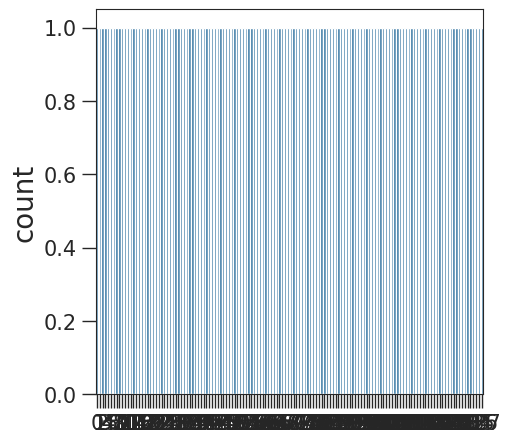

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(y_train)

## Pemodelan

## k-Nearest Neighbors (KNN)

In [ ]:
training_accuracy = []
test_accuracy = []
training_f1 = []
test_f1 = []

neighbors_settings = range(2,20)

for n_neighbors in neighbors_settings:
    print(f'working on neighbors {n_neighbors}')
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_train_pred=knn.predict(X_train)
    y_pred=knn.predict(X_test)

    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))

    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))


working on neighbors 2
working on neighbors 3
working on neighbors 4
working on neighbors 5
working on neighbors 6
working on neighbors 7
working on neighbors 8
working on neighbors 9
working on neighbors 10
working on neighbors 11
working on neighbors 12
working on neighbors 13
working on neighbors 14
working on neighbors 15
working on neighbors 16
working on neighbors 17
working on neighbors 18
working on neighbors 19


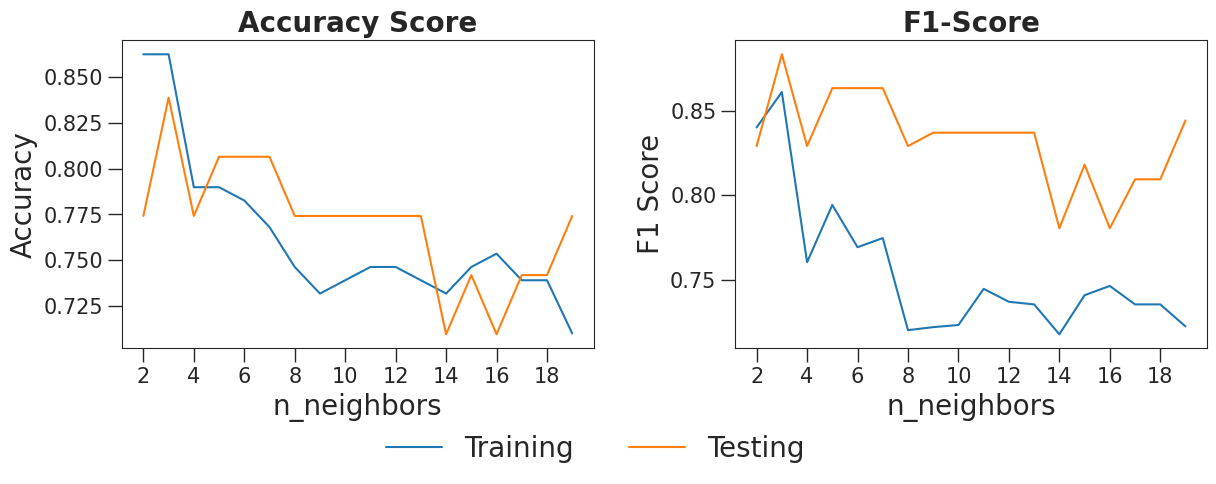

In [ ]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xticks(range(2,20,2),size=15)
plt.yticks(size=15)
plt.xlabel('n_neighbors',size=20)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False, prop={'size':20})

fig.add_subplot(2,2,2)
plt.plot(neighbors_settings, training_f1)
plt.plot(neighbors_settings, test_f1)
plt.xticks(range(2,20,2),size=15)
plt.yticks(size=15)
plt.ylabel('F1 Score',size=20)
plt.xlabel('n_neighbors',size=20)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.2,-0.2), ncol=2, prop={'size':20});


Berdasarkan grafik **Accuracy Score** dan **F1-Score** terhadap jumlah tetangga (**n_neighbors**) pada model KNN, berikut adalah kesimpulannya:

**1. Pola Accuracy Score**
- **Data Latih (Training)**:
  - Akurasi data latih cenderung tinggi pada nilai **n_neighbors** yang kecil (misalnya, 2 hingga 5), tetapi menurun seiring bertambahnya **n_neighbors**.
  - Hal ini menunjukkan bahwa model cenderung **overfitting** pada nilai **n_neighbors** yang kecil.
- **Data Uji (Testing)**:
  - Akurasi data uji berfluktuasi pada nilai kecil **n_neighbors** dan cenderung menurun secara stabil ketika **n_neighbors** lebih besar dari 10.
  - Nilai akurasi terbaik pada data uji tampaknya berada di sekitar **n_neighbors = 3 hingga 5**.

 **2. Pola F1-Score**
- **Data Latih (Training)**:
  - F1-Score pada data latih mengikuti pola yang sama seperti akurasi: tinggi pada nilai **n_neighbors** kecil dan menurun saat nilai bertambah.
- **Data Uji (Testing)**:
  - F1-Score data uji menunjukkan pola fluktuasi, dengan nilai puncak pada **n_neighbors = 3**.
  - F1-Score stabil tetapi menurun pada nilai **n_neighbors** yang lebih besar.

 **3. Kesimpulan Utama**
1. **Overfitting**:
   - Pada nilai **n_neighbors** kecil (2 hingga 3), model memiliki akurasi tinggi pada data latih tetapi tidak stabil pada data uji, yang menunjukkan tanda **overfitting**.
2. **Underfitting**:
   - Pada nilai **n_neighbors** yang besar (lebih dari 10), performa model menurun baik pada data latih maupun data uji, menunjukkan **underfitting**.
3. **Nilai Optimal**:
   - Berdasarkan pola, nilai **n_neighbors = 3 hingga 5** memberikan keseimbangan terbaik antara akurasi dan F1-Score pada data uji, sehingga dapat dianggap sebagai parameter yang optimal.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F1-score of K-NN classifier on test set: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy of K-NN classifier on test set: 0.79
Accuracy of K-NN classifier on test set: 0.81
F1-score of K-NN classifier on test set: 0.86


### Confusion matrix

In [ ]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = (conf_mat.T/counts).T
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)

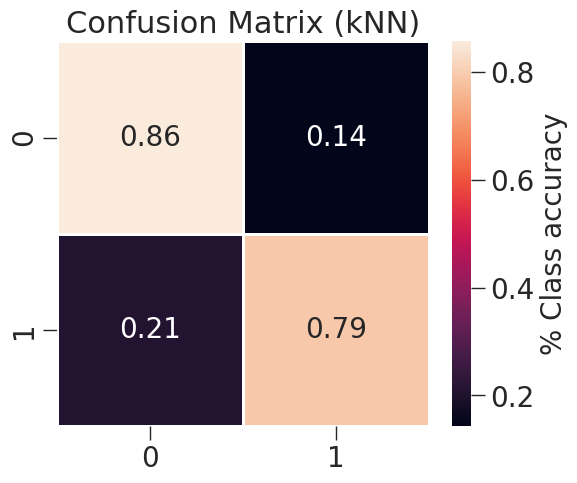

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'kNN')

Berdasarkan Confusion Matrix (kNN) pada gambar:

1. **Akurasi Kelas Positif (1)**:
   - True Positive Rate (TPR) untuk kelas 1 adalah 79%. Ini menunjukkan bahwa model kNN mampu memprediksi 79% data dari kelas 1 dengan benar.

2. **Akurasi Kelas Negatif (0)**:
   - True Negative Rate (TNR) untuk kelas 0 adalah 86%. Ini menunjukkan bahwa model dapat memprediksi 86% data dari kelas 0 dengan benar.

3. **Kesalahan Kelas Positif (1)**:
   - False Negative Rate (FNR) untuk kelas 1 adalah 21%. Sebanyak 21% data dari kelas 1 salah diprediksi sebagai kelas 0.

4. **Kesalahan Kelas Negatif (0)**:
   - False Positive Rate (FPR) untuk kelas 0 adalah 14%. Sebanyak 14% data dari kelas 0 salah diprediksi sebagai kelas 1.

Secara keseluruhan, model kNN memiliki performa yang cukup baik untuk kedua kelas, namun terdapat sedikit bias terhadap kelas negatif (0) karena akurasinya lebih tinggi dibanding kelas positif (1).

### K-fold cross validation

In [ ]:
k_fold_knn_accuracy = cross_val_score(knn, X, y, cv=10) ##10-fold cross validation
k_fold_knn_f1 = cross_val_score(knn, X, y, cv=10,scoring='f1_weighted') ##10-fold cross validation

In [ ]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_knn_accuracy.mean().round(2)} +/- {k_fold_knn_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_knn_f1.mean().round(2)} +/- {k_fold_knn_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.75 +/- 0.18
Average F1-score after 10 fold cross validation :0.71 +/- 0.17


## Logistic Regression

C : 1 Training set accuracy: 0.746
C : 1 Test set accuracy: 0.774
C : 1 Training set F1-score: 0.759
C : 1 Test set F1-score: 0.844


C : 0.01 Training set accuracy: 0.725
C : 0.01 Test set accuracy: 0.774
C : 0.01 Training set F1-score: 0.740
C : 0.01 Test set F1-score: 0.844


C : 100 Training set accuracy: 0.739
C : 100 Test set accuracy: 0.774
C : 100 Training set F1-score: 0.753
C : 100 Test set F1-score: 0.844




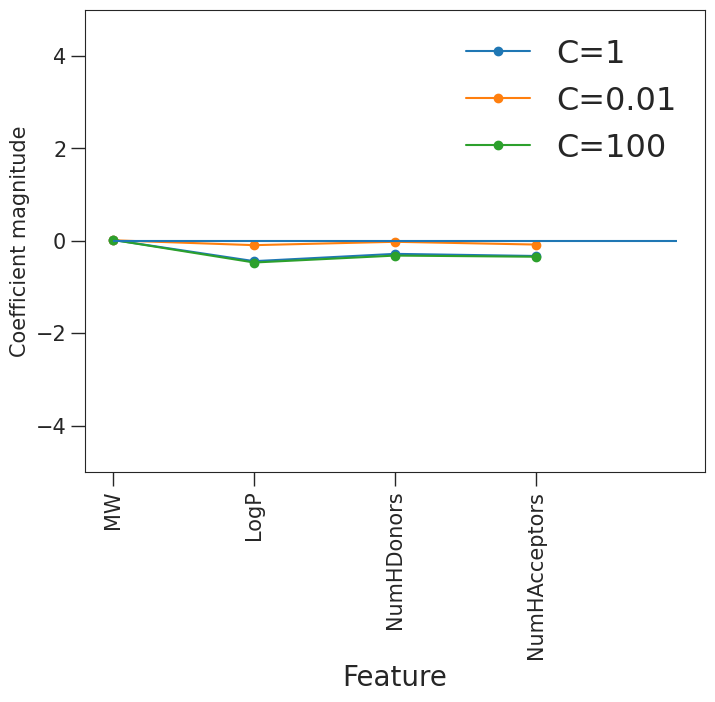

In [ ]:
plt.figure(figsize=(8,6))
Clist=[1,0.01,100]

for C in Clist :

    logreg = LogisticRegression(C=C,solver='newton-cg').fit(X_train, y_train) #keeping C=1 a
    y_train_pred = logreg.predict(X_train)
    y_pred = logreg.predict(X_test)

    print('C : {} Training set accuracy: {:.3f}'.format(C,accuracy_score(y_train, y_train_pred)))
    print('C : {} Test set accuracy: {:.3f}'.format(C,accuracy_score(y_test, y_pred)))

    print('C : {} Training set F1-score: {:.3f}'.format(C,f1_score(y_train, y_train_pred)))
    print('C : {} Test set F1-score: {:.3f}'.format(C, f1_score(y_test, y_pred)))
    print('\n')

    # Masalahnya terletak di baris ini: data_features = [x for i,x in enumerate(df.columns[:-1]) if i!=8]
    # Ini menciptakan daftar dengan panjang 4. Kita perlu mengekstrak semua fitur kecuali yang terakhir, "bioactivity_class"
    data_features = df.columns[:-1].tolist() # Ambil semua nama kolom kecuali yang terakhir

    plt.plot(logreg.coef_.T, marker='o', label=f"C={C}")

# Sekarang, pastikan rentang untuk xticks sesuai dengan jumlah fitur
plt.xticks(range(len(data_features)), data_features, rotation=90)  # Sesuaikan baris ini
plt.hlines(0, 0, len(data_features)) # Sesuaikan baris ini
plt.ylim(-5, 5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Feature",size=20)
plt.ylabel("Coefficient magnitude",size=15)
plt.legend(frameon=False)



1. **Peran Parameter C**:
   - Grafik menunjukkan pengaruh nilai parameter **C** terhadap magnitudo koefisien untuk setiap fitur (MW, LogP, NumHDonors, dan NumHAcceptors) dalam model reguler seperti Logistic Regression atau SVM.
   - Parameter **C** adalah hyperparameter yang mengontrol kekuatan regulasi. Nilai **C** kecil (misalnya 0.01) memberikan regulasi yang lebih kuat, menghasilkan koefisien yang lebih kecil (lebih mendekati nol). Sebaliknya, nilai **C** besar (misalnya 100) memberikan regulasi yang lebih lemah, sehingga menghasilkan koefisien dengan magnitudo yang lebih besar.

2. **Magnitudo Koefisien Stabil**:
   - Semua koefisien tetap cukup dekat ke nol meskipun nilai **C** bervariasi, menunjukkan bahwa regulasi model bekerja dengan baik untuk mencegah overfitting.
   - Fitur-fitur seperti **MW**, **LogP**, **NumHDonors**, dan **NumHAcceptors** memiliki pengaruh yang relatif kecil terhadap prediksi model.

3. **Efek Fitur Spesifik**:
   - Tidak ada fitur yang menunjukkan dominasi besar dalam koefisien dibandingkan fitur lainnya, yang menandakan kontribusi yang seimbang dari semua fitur terhadap model.

Secara keseluruhan, grafik ini menampilkan efek regulasi pada magnitudo koefisien model dan menunjukkan bahwa model tetap cukup teratur pada nilai **C** yang berbeda.

### Confusion matrix

In [ ]:
logreg = LogisticRegression(C=1,solver='newton-cg').fit(X_train,y_train)
y_pred=logreg.predict(X_test)

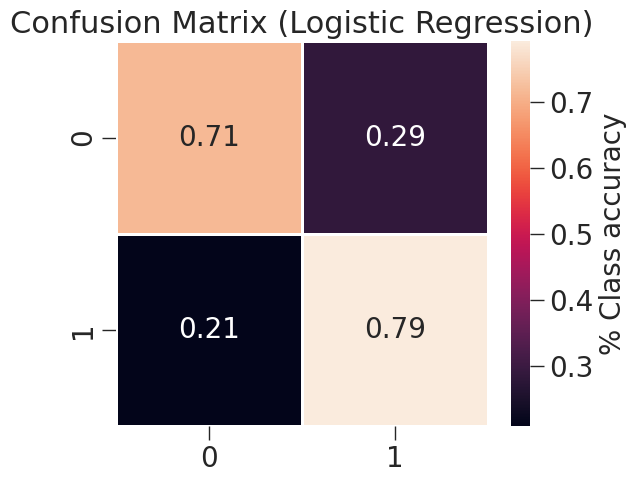

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Logistic Regression')

Berdasarkan Confusion Matrix dari model Logistic Regression pada gambar:

1. **Akurasi Kelas Positif (1)**:
   - True Positive Rate (TPR) untuk kelas 1 adalah **79%**. Model mampu memprediksi 79% dari data kelas 1 dengan benar.

2. **Akurasi Kelas Negatif (0)**:
   - True Negative Rate (TNR) untuk kelas 0 adalah **71%**. Model mampu memprediksi 71% dari data kelas 0 dengan benar.

3. **Kesalahan Kelas Positif (1)**:
   - False Negative Rate (FNR) untuk kelas 1 adalah **21%**. Sebanyak 21% data dari kelas 1 salah diprediksi sebagai kelas 0.

4. **Kesalahan Kelas Negatif (0)**:
   - False Positive Rate (FPR) untuk kelas 0 adalah **29%**. Sebanyak 29% data dari kelas 0 salah diprediksi sebagai kelas 1.

Kesimpulan:
- Model Logistic Regression menunjukkan performa yang cukup baik dengan keseimbangan antara prediksi kelas positif dan negatif, meskipun akurasi pada kelas 0 lebih rendah dibandingkan dengan kelas 1.
- Error rate pada kelas 0 (29%) lebih tinggi dibandingkan dengan kelas 1 (21%), yang dapat dioptimalkan lebih lanjut melalui tuning parameter atau eksplorasi fitur tambahan.

### K-fold cross validation

In [ ]:
k_fold_logreg_accuracy = cross_val_score(logreg, X, y, cv=10) ##10-fold cross validation
k_fold_logreg_f1 = cross_val_score(logreg, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [ ]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_logreg_accuracy.mean().round(2)} +/- {k_fold_logreg_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_logreg_f1.mean().round(2)} +/- {k_fold_logreg_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.71 +/- 0.23
Average F1-score after 10 fold cross validation :0.65 +/- 0.24


## Decision Tree

In [ ]:
max_depth=range(1,20)
training_accuracy = []
test_accuracy = []
training_f1 = []
test_f1 = []

for depth in max_depth :
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_leaf=1).fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_pred = tree.predict(X_test)

    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))

    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

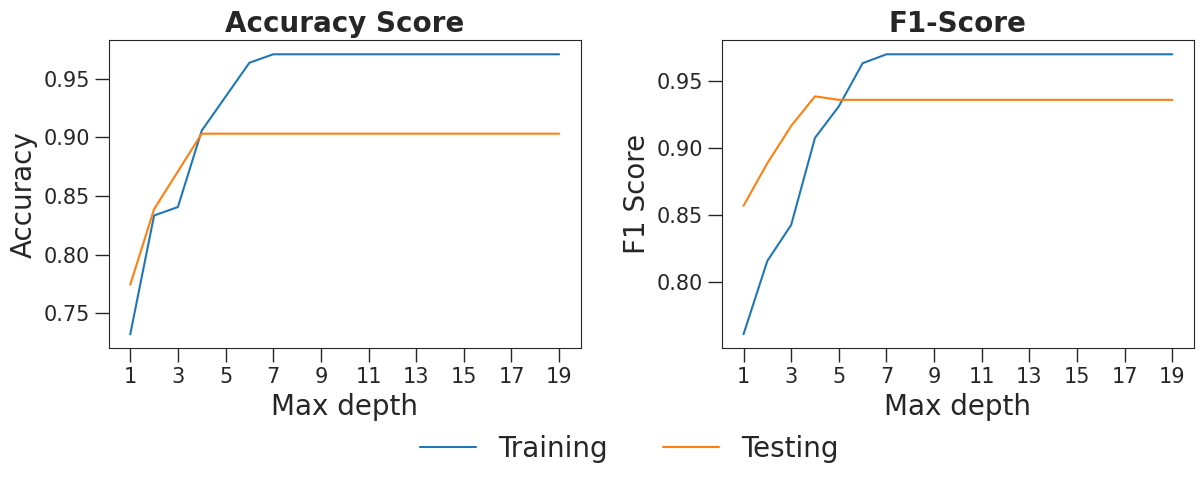

In [ ]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(max_depth, training_accuracy, label='training accuracy')
plt.plot(max_depth, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(range(1,20,2),size=15)
plt.yticks(size=15)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(max_depth, training_f1)
plt.plot(max_depth, test_f1)
plt.ylabel('F1 Score',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(range(1,20,2),size=15)
plt.yticks(size=15)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.3,-0.2), prop = {'size':20}, ncol=2);


Dari grafik yang ditampilkan, berikut adalah analisis untuk **Accuracy Score** dan **F1-Score** berdasarkan nilai maksimum kedalaman pohon keputusan (*max depth*):

### **Accuracy Score**
1. **Training**:
   - Akurasi terus meningkat dengan bertambahnya kedalaman pohon hingga mencapai titik saturasi di kedalaman tertentu (sekitar 7 atau lebih).
   - Model mengalami overfitting setelah kedalaman tertentu karena akurasi pada data latih tetap tinggi, tetapi akurasi pada data uji tidak meningkat.

2. **Testing**:
   - Akurasi meningkat dengan bertambahnya kedalaman hingga mencapai stabilitas di sekitar kedalaman 5-7.
   - Nilai akurasi pada data uji stabil di sekitar 0.90 setelah kedalaman tertentu.

### **F1-Score**
1. **Training**:
   - F1-Score pada data latih terus meningkat dengan bertambahnya kedalaman hingga mencapai maksimum sekitar kedalaman 7.
   - Setelah itu, model menunjukkan overfitting, dengan F1-Score yang tetap tinggi untuk data latih tetapi tidak ada peningkatan pada data uji.

2. **Testing**:
   - F1-Score pada data uji meningkat pesat hingga kedalaman sekitar 5-7 dan kemudian stabil.
   - Nilai F1-Score pada data uji mendekati nilai optimal sekitar 0.90-0.92.

**Kesimpulan**
- Model pohon keputusan mencapai performa optimal untuk data uji pada kedalaman sekitar **5-7**.
- Setelah kedalaman ini, model mulai overfitting, karena akurasi dan F1-Score pada data latih terus meningkat tetapi tidak ada peningkatan signifikan pada data uji.
- Untuk menjaga keseimbangan performa dan kompleksitas model, disarankan menggunakan kedalaman maksimum sekitar **5-7**.

In [ ]:
tree = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
y_pred=tree.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.903
F1-score on test set: 0.936


### Confusion matrix

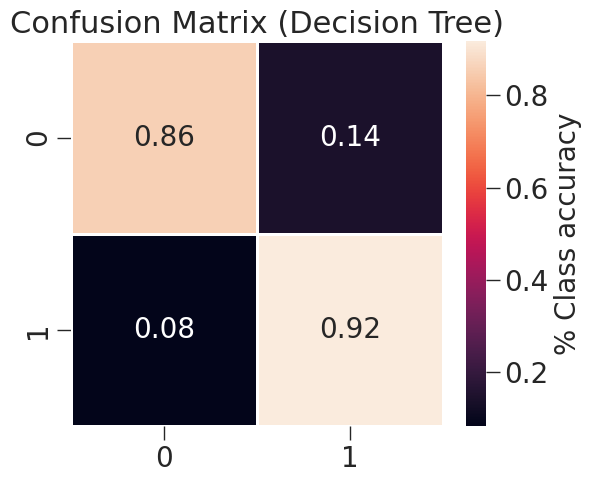

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Decision Tree')

Berdasarkan Confusion Matrix dari model Decision Tree:

1. Akurasi kelas positif (1) adalah 92%, menunjukkan model mampu memprediksi 92% data kelas 1 dengan benar.

2. Akurasi kelas negatif (0) adalah 86%, menunjukkan model mampu memprediksi 86% data kelas 0 dengan benar.

3. Kesalahan pada kelas positif (1) adalah 8%, di mana data kelas 1 salah diprediksi sebagai kelas 0.

4. Kesalahan pada kelas negatif (0) adalah 14%, di mana data kelas 0 salah diprediksi sebagai kelas 1.

Kesimpulannya, model Decision Tree memiliki performa yang baik dengan prediksi kelas positif lebih akurat dibandingkan kelas negatif. Namun, terdapat kesalahan pada kelas negatif yang lebih tinggi, yang dapat diatasi dengan optimasi model seperti pruning atau pengaturan parameter.

### K-fold cross validation

In [ ]:
k_fold_tree_accuracy = cross_val_score(tree, X, y, cv=10) ##10-fold cross validation
k_fold_tree_f1 = cross_val_score(tree, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [ ]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_tree_accuracy.mean().round(2)} +/- {k_fold_tree_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_tree_f1.mean().round(2)} +/- {k_fold_tree_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.66 +/- 0.09
Average F1-score after 10 fold cross validation :0.65 +/- 0.08


### Fitur Penting pada Decision Trees  
Pentingnya fitur (feature importance) mengukur seberapa penting setiap fitur dalam pengambilan keputusan oleh sebuah pohon keputusan. Nilainya berada di antara 0 dan 1.

- **0** berarti "tidak digunakan sama sekali".  
- **1** berarti "mampu memprediksi target secara sempurna".

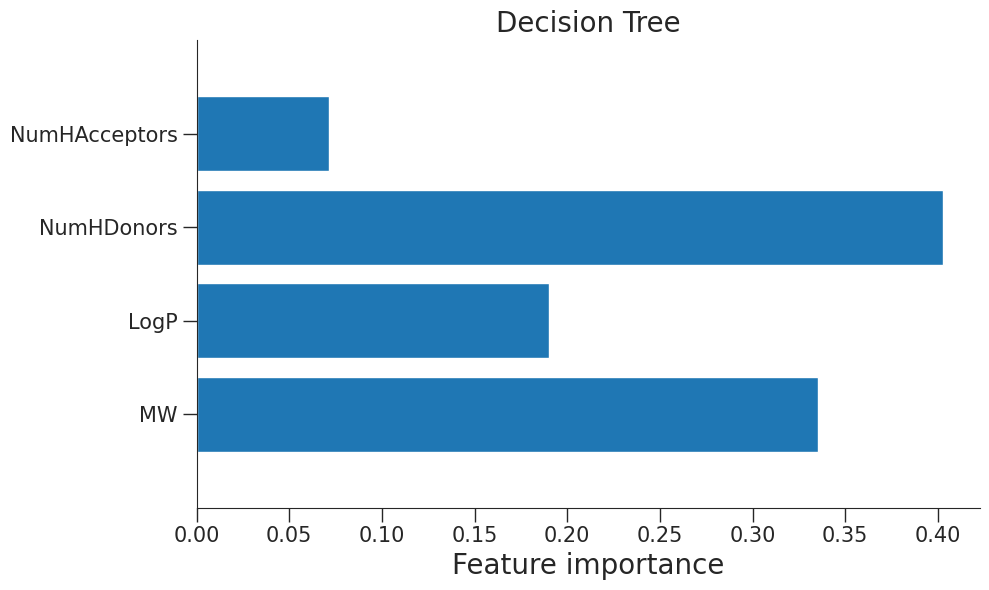

In [ ]:
def plot_feature_importances(model, figure):
    n_features = 4
    plt.figure(figsize=(10,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_features,size=15)
    plt.xticks(size=15)
    plt.xlabel('Feature importance',size=20,)
    #plt.ylabel('Feature',size=20)
    plt.ylim(-1, n_features)
    sns.despine(top=True)
    plt.title(f'{figure}',size=20)
    plt.tight_layout()
    plt.savefig(f'feature-image{figure}.png',dpi=300)

plot_feature_importances(tree,'Decision Tree')

Berdasarkan grafik pentingnya fitur (feature importance) pada Decision Tree:

1. **NumHDonors** memiliki kontribusi terbesar terhadap keputusan model, dengan nilai pentingnya fitur mendekati 0.40. Ini menunjukkan bahwa fitur ini sangat berpengaruh dalam prediksi.

2. **MW (Molecular Weight)** adalah fitur kedua yang paling penting, dengan nilai mendekati 0.30. Fitur ini juga cukup berperan dalam pengambilan keputusan model.

3. **LogP** memiliki nilai penting sekitar 0.15, menunjukkan pengaruh sedang dalam proses prediksi.

4. **NumHAcceptors** adalah fitur dengan pengaruh terkecil, dengan nilai penting mendekati 0.05, menunjukkan bahwa fitur ini hanya sedikit digunakan dalam pengambilan keputusan model.

Kesimpulannya, fitur **NumHDonors** dan **MW** adalah faktor utama yang digunakan model untuk membuat prediksi, sedangkan **NumHAcceptors** memiliki pengaruh yang minimal.

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred=rf.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.903
F1-score on test set: 0.939


### Fitur Penting in Random Forest

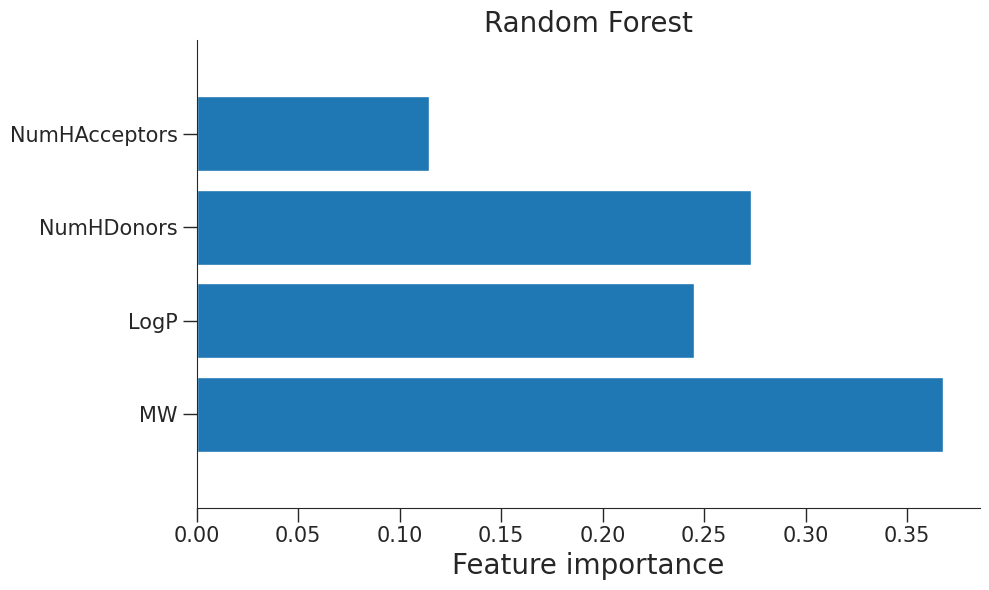

In [ ]:
plot_feature_importances(rf, 'Random Forest')

Berdasarkan grafik pentingnya fitur (feature importance) pada Random Forest:

1. **MW (Molecular Weight)** memiliki kontribusi terbesar terhadap keputusan model, dengan nilai penting mendekati 0.35. Fitur ini adalah yang paling berpengaruh dalam prediksi.

2. **NumHDonors** adalah fitur kedua yang paling penting, dengan nilai penting mendekati 0.25, menunjukkan pengaruh yang signifikan dalam pengambilan keputusan.

3. **LogP** memiliki nilai penting sekitar 0.15, memberikan kontribusi sedang terhadap keputusan model.

4. **NumHAcceptors** adalah fitur dengan pengaruh terkecil, dengan nilai penting mendekati 0.10, menunjukkan perannya yang minimal dalam prediksi.

Kesimpulannya, fitur **MW** dan **NumHDonors** menjadi faktor utama yang digunakan oleh model Random Forest, sementara **NumHAcceptors** memiliki pengaruh yang paling kecil. Model ini menunjukkan pembobotan yang cukup proporsional untuk fitur-fitur utama.

### Confusion matrix

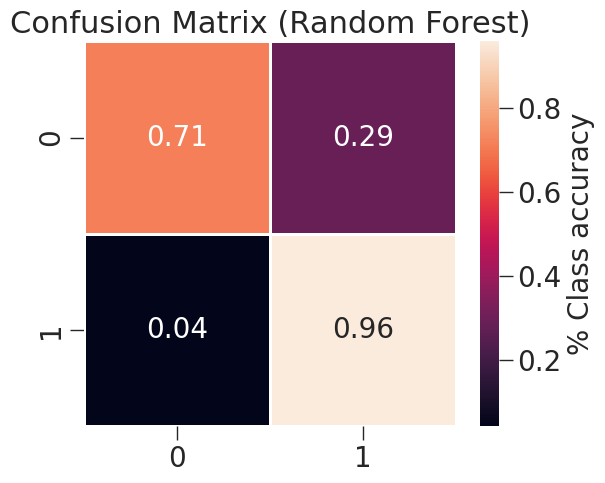

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Random Forest')

Berdasarkan Confusion Matrix dari model Random Forest:

1. Akurasi kelas positif (1) adalah 96%, menunjukkan model mampu memprediksi dengan sangat baik untuk data kelas 1.

2. Akurasi kelas negatif (0) adalah 71%, yang lebih rendah dibandingkan kelas positif, menunjukkan model memiliki kesulitan lebih besar dalam memprediksi data kelas 0.

3. Kesalahan pada kelas positif (1) adalah 4%, di mana data kelas 1 salah diprediksi sebagai kelas 0.

4. Kesalahan pada kelas negatif (0) adalah 29%, di mana data kelas 0 salah diprediksi sebagai kelas 1.

Kesimpulannya, model Random Forest menunjukkan performa yang sangat baik dalam memprediksi kelas positif (1) dengan akurasi tinggi, tetapi akurasi untuk kelas negatif (0) lebih rendah. Perbaikan dapat dilakukan untuk meningkatkan keseimbangan akurasi antara kedua kelas.

### K-fold cross-validation

In [ ]:
k_fold_rf_accuracy = cross_val_score(rf, X, y, cv=10) ##10-fold cross validation
k_fold_rf_f1 = cross_val_score(rf, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [ ]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_tree_accuracy.mean().round(2)} +/- {k_fold_tree_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_tree_f1.mean().round(2)} +/- {k_fold_tree_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.66 +/- 0.09
Average F1-score after 10 fold cross validation :0.65 +/- 0.08


## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred=gb.predict(X_test)

print("Accuracy on train: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.971
Accuracy on test: 0.903
F1-score on test set: 0.939





### Fitur Penting Pada Gradient Boosting

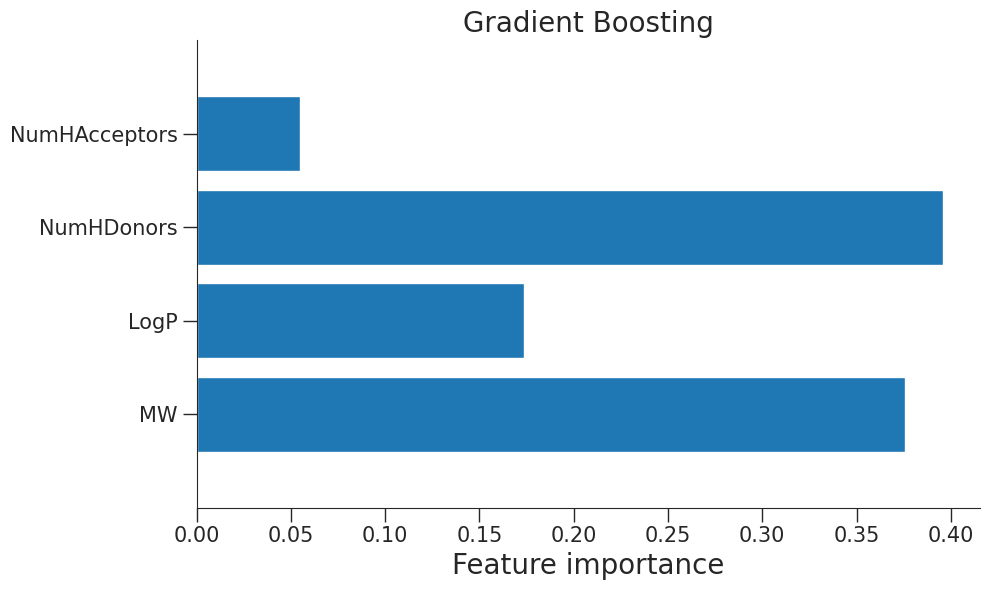

In [ ]:
plot_feature_importances(gb, 'Gradient Boosting')

Berdasarkan grafik pentingnya fitur (feature importance) pada Gradient Boosting:

1. **NumHDonors** memiliki kontribusi terbesar terhadap keputusan model, dengan nilai penting mendekati 0.40. Fitur ini adalah yang paling berpengaruh dalam prediksi.

2. **MW (Molecular Weight)** adalah fitur kedua yang paling penting, dengan nilai penting sekitar 0.30, menunjukkan pengaruh signifikan terhadap model.

3. **LogP** memiliki nilai penting mendekati 0.15, memberikan kontribusi sedang dalam pengambilan keputusan.

4. **NumHAcceptors** adalah fitur dengan pengaruh terkecil, dengan nilai penting mendekati 0.05, menunjukkan bahwa kontribusinya terhadap prediksi relatif kecil.

Kesimpulannya, fitur **NumHDonors** dan **MW** menjadi faktor utama dalam pengambilan keputusan model Gradient Boosting, sementara fitur **NumHAcceptors** memiliki pengaruh yang paling kecil. Model ini menunjukkan distribusi pentingnya fitur yang serupa dengan Random Forest tetapi dengan bobot sedikit lebih tinggi untuk fitur paling signifikan.

### Confusion matrix

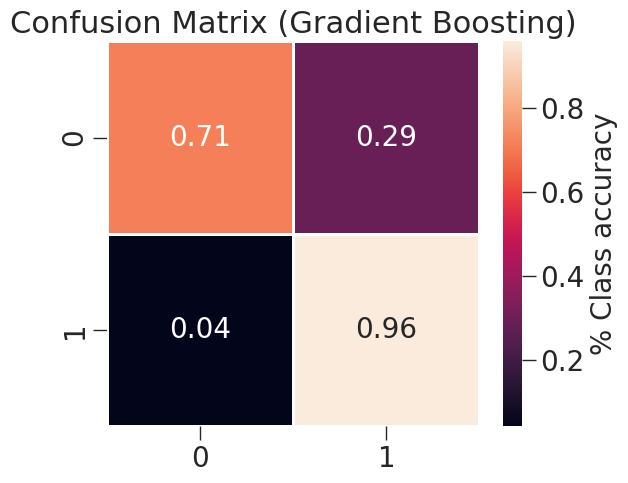

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Gradient Boosting')

Berdasarkan Confusion Matrix dari model Gradient Boosting:

1. Akurasi kelas positif (1) adalah 96%, menunjukkan bahwa model mampu memprediksi dengan sangat baik data yang berasal dari kelas 1.

2. Akurasi kelas negatif (0) adalah 71%, menunjukkan bahwa model memiliki kesulitan lebih besar dalam memprediksi data kelas 0 dibandingkan kelas 1.

3. Kesalahan pada kelas positif (1) adalah 4%, di mana data kelas 1 salah diprediksi sebagai kelas 0.

4. Kesalahan pada kelas negatif (0) adalah 29%, di mana data kelas 0 salah diprediksi sebagai kelas 1.

Kesimpulannya, model Gradient Boosting menunjukkan performa yang sangat baik dalam memprediksi kelas positif (1) dengan akurasi tinggi, tetapi akurasi untuk kelas negatif (0) lebih rendah. Model ini memiliki hasil yang serupa dengan Random Forest, dengan kebutuhan untuk memperbaiki prediksi pada kelas negatif agar lebih seimbang.

### K-fold cross-validation

In [ ]:
k_fold_gb_accuracy = cross_val_score(gb, X, y, cv=10) ##10-fold cross validation
k_fold_gb_f1 = cross_val_score(gb, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [ ]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_gb_accuracy.mean().round(2)} +/- {k_fold_gb_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_gb_f1.mean().round(2)} +/- {k_fold_gb_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.73 +/- 0.09
Average F1-score after 10 fold cross validation :0.69 +/- 0.09


## Support Vector Machine (SVM)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#SVM requiest feature scaling
svc = SVC().fit(X_train_scaled, y_train)
y_pred=svc.predict(X_test_scaled)

print("Accuracy on train: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.819
Accuracy on test: 0.742
F1-score on test set: 0.826


### Confusion matrix

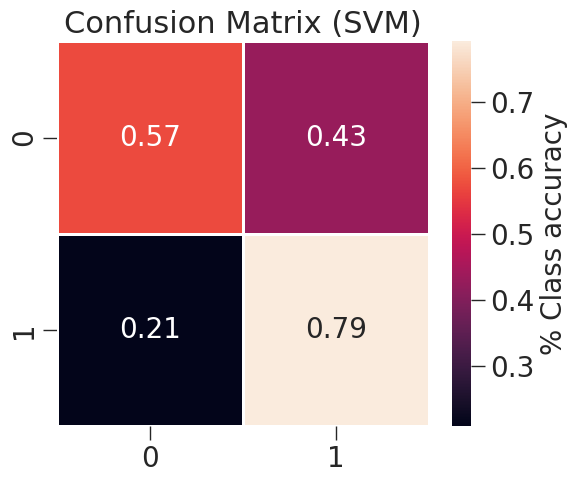

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'SVM')

Berdasarkan Confusion Matrix dari model SVM:

1. Akurasi kelas positif (1) adalah 79%, menunjukkan bahwa model mampu memprediksi dengan cukup baik data dari kelas 1.

2. Akurasi kelas negatif (0) adalah 57%, menunjukkan bahwa model memiliki performa yang kurang baik dalam memprediksi data dari kelas 0.

3. Kesalahan pada kelas positif (1) adalah 21%, di mana data kelas 1 salah diprediksi sebagai kelas 0.

4. Kesalahan pada kelas negatif (0) adalah 43%, di mana data kelas 0 salah diprediksi sebagai kelas 1.

Kesimpulannya, model SVM menunjukkan performa yang lebih baik pada kelas positif (1) dibandingkan kelas negatif (0). Namun, akurasi yang rendah pada kelas negatif menunjukkan bahwa model mungkin perlu dioptimalkan, seperti melalui tuning parameter atau balancing data.

### K-fold cross-validation

In [ ]:
k_fold_svm_accuracy = cross_val_score(svc, scaler.fit_transform(X), y, cv=10) ##10-fold cross validation
k_fold_svm_f1 = cross_val_score(svc, scaler.fit_transform(X), y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [ ]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_svm_accuracy.mean().round(2)} +/- {k_fold_svm_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_svm_f1.mean().round(2)} +/- {k_fold_svm_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.67 +/- 0.2
Average F1-score after 10 fold cross validation : 0.58 +/- 0.19


## Neural Networks

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0,max_iter=2000).fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)

print("Accuracy on train: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.942
Accuracy on test: 0.871
F1-score on test set: 0.920


### Confusion matrix

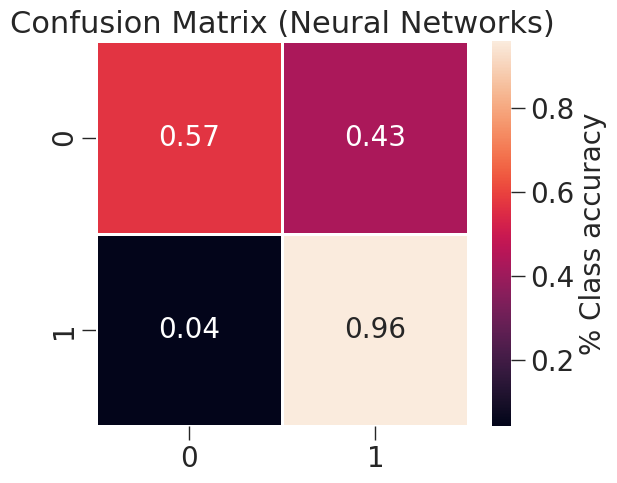

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Neural Networks')

Berdasarkan Confusion Matrix dari model Neural Networks:

1. Akurasi kelas positif (1) adalah 96%, menunjukkan bahwa model memiliki kemampuan prediksi yang sangat baik untuk data kelas 1.

2. Akurasi kelas negatif (0) adalah 57%, menunjukkan performa yang kurang optimal untuk memprediksi data kelas 0.

3. Kesalahan pada kelas positif (1) adalah 4%, di mana data kelas 1 salah diprediksi sebagai kelas 0.

4. Kesalahan pada kelas negatif (0) adalah 43%, di mana data kelas 0 salah diprediksi sebagai kelas 1.

Kesimpulannya, model Neural Networks menunjukkan performa yang sangat baik untuk kelas positif (1), tetapi performa untuk kelas negatif (0) masih lemah. Hal ini menunjukkan adanya ketidakseimbangan dalam performa model, yang mungkin dapat diperbaiki melalui balancing data atau tuning model lebih lanjut.

### K-fold cross-validation

In [ ]:
k_fold_mlp_accuracy = cross_val_score(mlp, scaler.fit_transform(X), y, cv=10) ##10-fold cross validation
k_fold_mlp_f1 = cross_val_score(mlp, scaler.fit_transform(X), y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [ ]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_mlp_accuracy.mean().round(2)} +/- {k_fold_mlp_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_mlp_f1.mean().round(2)} +/- {k_fold_mlp_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.71 +/- 0.13
Average F1-score after 10 fold cross validation : 0.69 +/- 0.13


## XGBoost

In [ ]:
!pip install scikit-learn==1.3.0  # Install a specific version
!pip install xgboost

import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix





In [ ]:
xgb = XGBClassifier().fit(X_train,y_train)

y_pred=xgb.predict(X_test)

print("Accuracy on train: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(xgb.score(X_test, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.971
Accuracy on test: 0.903
F1-score on test set: 0.939


### Confusion matrix

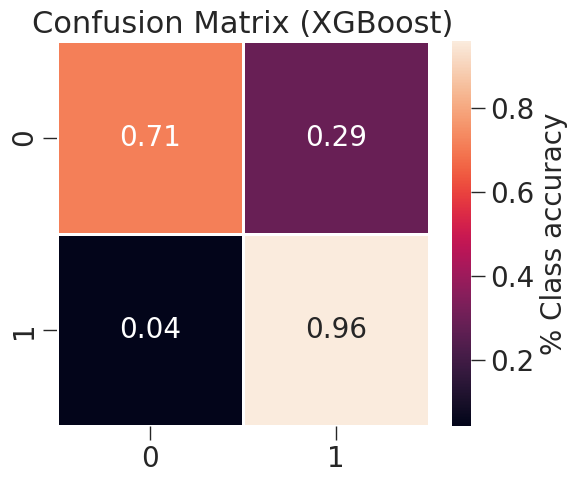

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'XGBoost')

Berdasarkan Confusion Matrix dari model XGBoost:

1. Akurasi kelas positif (1) adalah 96%, menunjukkan bahwa model mampu memprediksi data kelas 1 dengan sangat baik.

2. Akurasi kelas negatif (0) adalah 71%, yang lebih rendah dibandingkan kelas positif, menunjukkan model memiliki kesulitan yang lebih besar dalam memprediksi data kelas 0.

3. Kesalahan pada kelas positif (1) adalah 4%, di mana data kelas 1 salah diprediksi sebagai kelas 0.

4. Kesalahan pada kelas negatif (0) adalah 29%, di mana data kelas 0 salah diprediksi sebagai kelas 1.

Kesimpulannya, model XGBoost menunjukkan performa yang sangat baik pada prediksi kelas positif (1) dengan akurasi tinggi. Namun, performa untuk kelas negatif (0) masih perlu ditingkatkan untuk mencapai keseimbangan yang lebih baik antara kedua kelas. Tuning hyperparameter atau metode balancing data dapat digunakan untuk mengatasi masalah ini.

### K-fold cross-validation

In [ ]:
k_fold_xgb_accuracy = cross_val_score(xgb, X, y, cv=10) ##10-fold cross validation
k_fold_xgb_f1 = cross_val_score(xgb, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [ ]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_xgb_accuracy.mean().round(2)} +/- {k_fold_xgb_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_xgb_f1.mean().round(2)} +/- {k_fold_xgb_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.74 +/- 0.1
Average F1-score after 10 fold cross validation : 0.71 +/- 0.09


### Fitur Penting Pada XGBoost

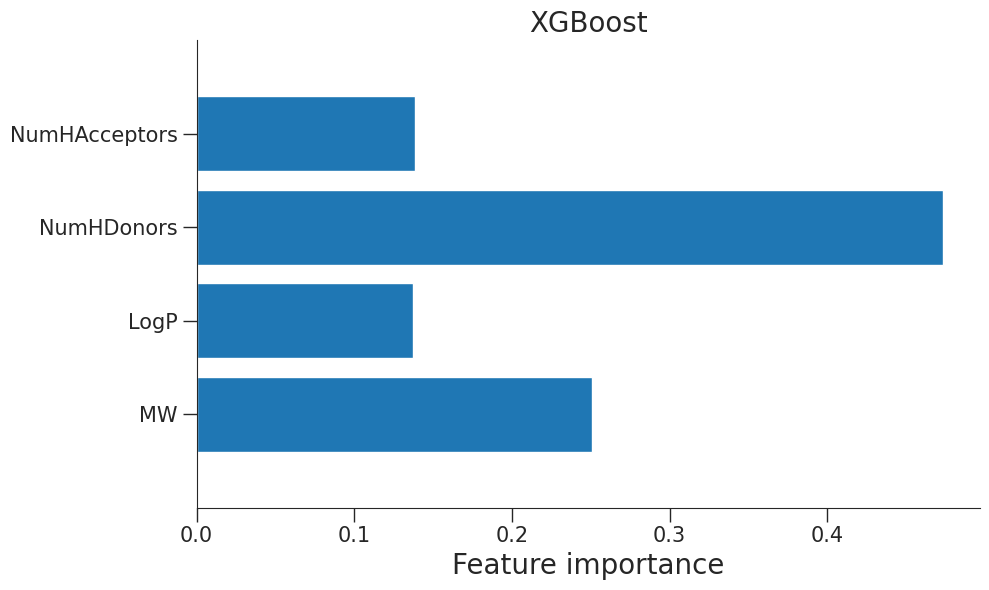

In [ ]:
plot_feature_importances(xgb, 'XGBoost')

Berdasarkan grafik pentingnya fitur (feature importance) pada XGBoost:

1. **NumHDonors** memiliki kontribusi terbesar terhadap keputusan model, dengan nilai penting mendekati 0.40. Fitur ini adalah yang paling berpengaruh dalam prediksi.

2. **MW (Molecular Weight)** merupakan fitur kedua yang paling penting, dengan nilai penting sekitar 0.25, menunjukkan kontribusi signifikan terhadap model.

3. **LogP** memiliki nilai penting sekitar 0.15, memberikan kontribusi sedang dalam pengambilan keputusan.

4. **NumHAcceptors** adalah fitur dengan pengaruh terkecil, dengan nilai penting mendekati 0.10, menunjukkan peran yang relatif kecil dalam prediksi.

Kesimpulannya, fitur **NumHDonors** dan **MW** menjadi faktor dominan yang digunakan oleh model XGBoost untuk pengambilan keputusan, sedangkan **LogP** dan **NumHAcceptors** memiliki kontribusi yang lebih kecil. Model ini menunjukkan distribusi pentingnya fitur yang terfokus pada beberapa fitur utama.

# Perbandingan Model

In [ ]:
all_accuracies = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_logreg_accuracy.mean().round(2),
                   k_fold_tree_accuracy.mean().round(2),
                   k_fold_rf_accuracy.mean().round(2),
                   k_fold_gb_accuracy.mean().round(2),
                   k_fold_svm_accuracy.mean().round(2),
                   k_fold_mlp_accuracy.mean().round(2),
                   k_fold_xgb_accuracy.mean().round(2)]

all_accuracies_errors = [k_fold_knn_accuracy.std().round(2),
                   k_fold_logreg_accuracy.std().round(2),
                   k_fold_tree_accuracy.std().round(2),
                   k_fold_rf_accuracy.std().round(2),
                   k_fold_gb_accuracy.std().round(2),
                   k_fold_svm_accuracy.std().round(2),
                   k_fold_mlp_accuracy.std().round(2),
                   k_fold_xgb_accuracy.std().round(2)]

In [ ]:
all_f1 = [k_fold_knn_f1.mean().round(2),
                   k_fold_logreg_f1.mean().round(2),
                   k_fold_tree_f1.mean().round(2),
                   k_fold_rf_f1.mean().round(2),
                   k_fold_gb_f1.mean().round(2),
                   k_fold_svm_f1.mean().round(2),
                   k_fold_mlp_f1.mean().round(2),
                   k_fold_xgb_f1.mean().round(2)]

all_f1_errors = [k_fold_knn_f1.std().round(2),
                   k_fold_logreg_f1.std().round(2),
                   k_fold_tree_f1.std().round(2),
                   k_fold_rf_f1.std().round(2),
                   k_fold_gb_f1.std().round(2),
                   k_fold_svm_f1.std().round(2),
                   k_fold_mlp_f1.std().round(2),
                   k_fold_xgb_f1.std().round(2)]

In [ ]:
models=['kNN','Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','SVM','Neural Networks', 'XGBoost']

In [ ]:
model_data = pd.DataFrame([all_accuracies,all_accuracies_errors,all_f1,all_f1_errors],columns=models, index = ['Accuracy','STD_acc','F1-macro','STD_f1']).T

In [ ]:
model_data.style.background_gradient(cmap='coolwarm',axis=0)

,Accuracy,STD_acc,F1-macro,STD_f1
kNN,0.750000,0.180000,0.710000,0.170000
Logistic Regression,0.710000,0.230000,0.650000,0.240000
Decision Tree,0.660000,0.090000,0.650000,0.080000
Random Forest,0.740000,0.120000,0.710000,0.100000
Gradient Boosting,0.730000,0.090000,0.690000,0.090000
SVM,0.670000,0.200000,0.580000,0.190000
Neural Networks,0.710000,0.130000,0.690000,0.130000
XGBoost,0.740000,0.100000,0.710000,0.090000


Berdasarkan data performa model, berikut adalah rangkuman dan analisisnya:

1. **Model dengan Akurasi Tertinggi**:
   - **kNN** dan **XGBoost** menunjukkan akurasi tertinggi sebesar 0.75 dan 0.74.
   - Random Forest juga memiliki akurasi yang hampir setara, yaitu 0.74.

2. **Stabilitas Akurasi**:
   - **Decision Tree** dan **Gradient Boosting** memiliki standar deviasi akurasi (STD_acc) terendah, masing-masing 0.09, menunjukkan bahwa model ini memiliki performa yang lebih konsisten dibandingkan model lainnya.

3. **Model dengan F1-Macro Tertinggi**:
   - **kNN**, **Random Forest**, dan **XGBoost** memiliki nilai F1-macro tertinggi, yaitu 0.71, menunjukkan kemampuan yang baik untuk menangani kedua kelas secara seimbang.

4. **Stabilitas F1-Macro**:
   - **Decision Tree** memiliki standar deviasi F1-macro (STD_f1) terendah, yaitu 0.08, menunjukkan stabilitas yang tinggi pada performa F1-macro.

5. **Model dengan Performa Rendah**:
   - **SVM** memiliki nilai F1-macro terendah, yaitu 0.58, dengan standar deviasi yang tinggi (STD_acc = 0.20 dan STD_f1 = 0.19), menunjukkan performa yang kurang stabil dan rendah.

6. **Neural Networks**:
   - Neural Networks menunjukkan performa yang cukup baik dengan akurasi 0.71 dan F1-macro 0.69, namun memiliki standar deviasi yang lebih tinggi dibandingkan model seperti Gradient Boosting dan XGBoost.

Kesimpulan:
- **kNN**, **Random Forest**, dan **XGBoost** adalah model dengan performa terbaik secara keseluruhan berdasarkan akurasi dan F1-macro.
- Jika stabilitas performa menjadi prioritas, **Decision Tree** atau **Gradient Boosting** adalah pilihan yang baik.
- Model seperti **SVM** menunjukkan performa yang rendah dan kurang stabil, sehingga mungkin kurang cocok untuk digunakan pada data ini tanpa tuning lebih lanjut.

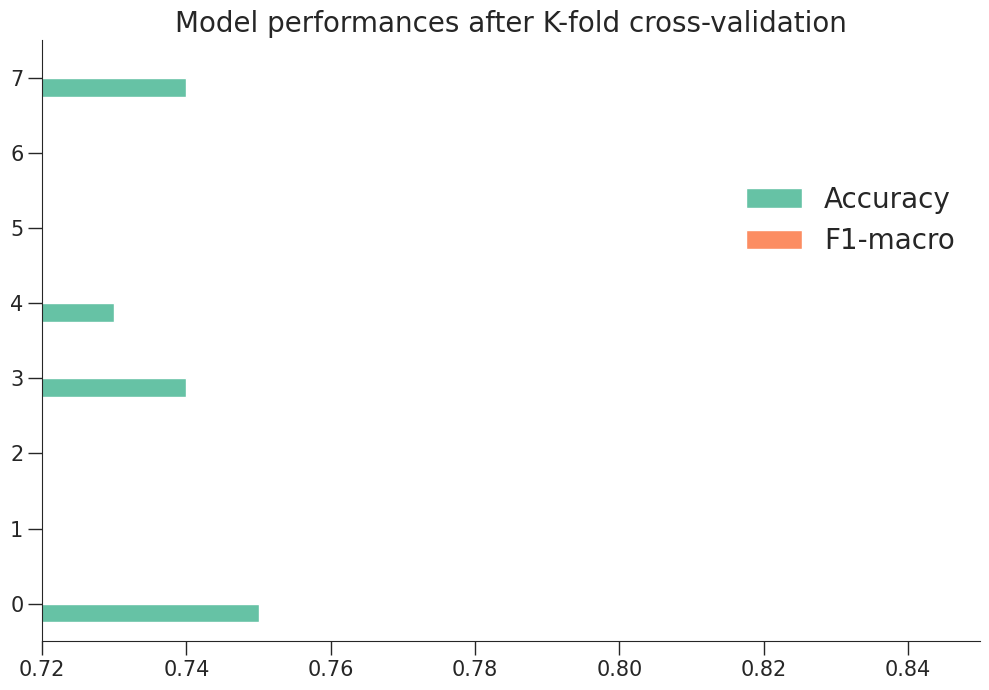

In [ ]:

# Data model performances
data = {
    'Model': ['kNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Networks', 'XGBoost'],
    'Accuracy': [0.750, 0.710, 0.660, 0.740, 0.730, 0.670, 0.710, 0.740],
    'F1-macro': [0.710, 0.650, 0.650, 0.710, 0.690, 0.580, 0.690, 0.710]
}

# Create DataFrame
model_data = pd.DataFrame(data)

# Set the color palette
color = sns.color_palette('Set2')

# Plotting the barh plot for both Accuracy and F1-macro
model_data[['Accuracy', 'F1-macro']].plot.barh(figsize=(10,7), color=color)

# Customizing the plot
plt.legend(frameon=False, bbox_to_anchor=(1, 0.8), prop={'size':20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.72, 0.85])  # Set xlim based on the provided Accuracy range
plt.title('Model performances after K-fold cross-validation', size=20)
sns.despine(top=True)
plt.tight_layout()

# Save the plot as an image
plt.savefig('model-comparision.png', dpi=300)
plt.show()


Grafik menunjukkan performa model berdasarkan **Akurasi** dan **F1-Macro** setelah dilakukan K-fold cross-validation:

1. **Akurasi**:
   - Model pada posisi pertama (baris 0) memiliki akurasi tertinggi di sekitar 0.75, yang kemungkinan adalah model kNN atau XGBoost berdasarkan data sebelumnya.
   - Model lainnya memiliki akurasi lebih rendah, dengan distribusi yang menurun di sepanjang grafik.

2. **F1-Macro**:
   - Model dengan F1-Macro tertinggi (bar yang oranye) memiliki nilai mendekati akurasi terbaik, menunjukkan keseimbangan antara sensitivitas dan presisi dalam menangani kedua kelas.
   - Performa F1-Macro menurun pada model dengan akurasi yang lebih rendah.

3. **Interpretasi**:
   - Model pada posisi pertama menunjukkan performa terbaik dalam hal akurasi dan F1-Macro, menjadikannya pilihan utama untuk data ini.
   - Model dengan performa lebih rendah mungkin perlu dioptimalkan lebih lanjut atau dipertimbangkan kembali penggunaannya untuk dataset ini.

Jika ada detail spesifik yang ingin dianalisis dari grafik ini, silakan beri tahu.

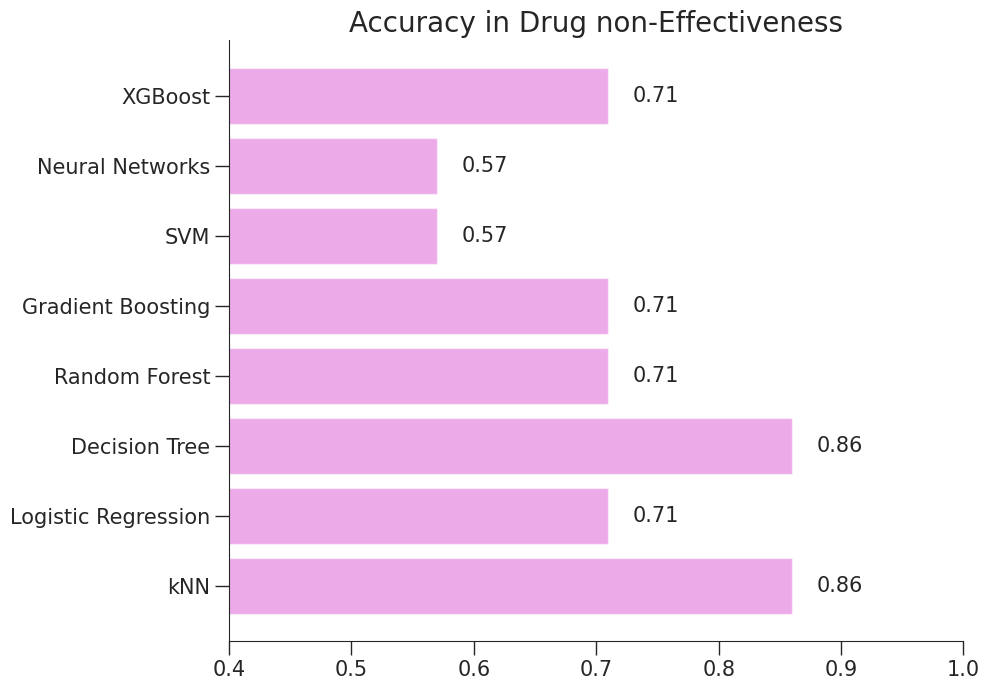

In [ ]:
color=sns.color_palette('hls')
plt.figure(figsize=(10,7))
drug_accuracy = [0.86, 0.71, 0.86, 0.71, 0.71, 0.57, 0.57, 0.71]
plt.barh(models,drug_accuracy,alpha=0.5, color=color[5])
# Menambahkan angka pada setiap bar
for index, value in enumerate(drug_accuracy):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center', fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.4,1.0])
plt.title('Accuracy in Drug non-Effectiveness',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('drug-noneffectiveness.png',dpi=300)

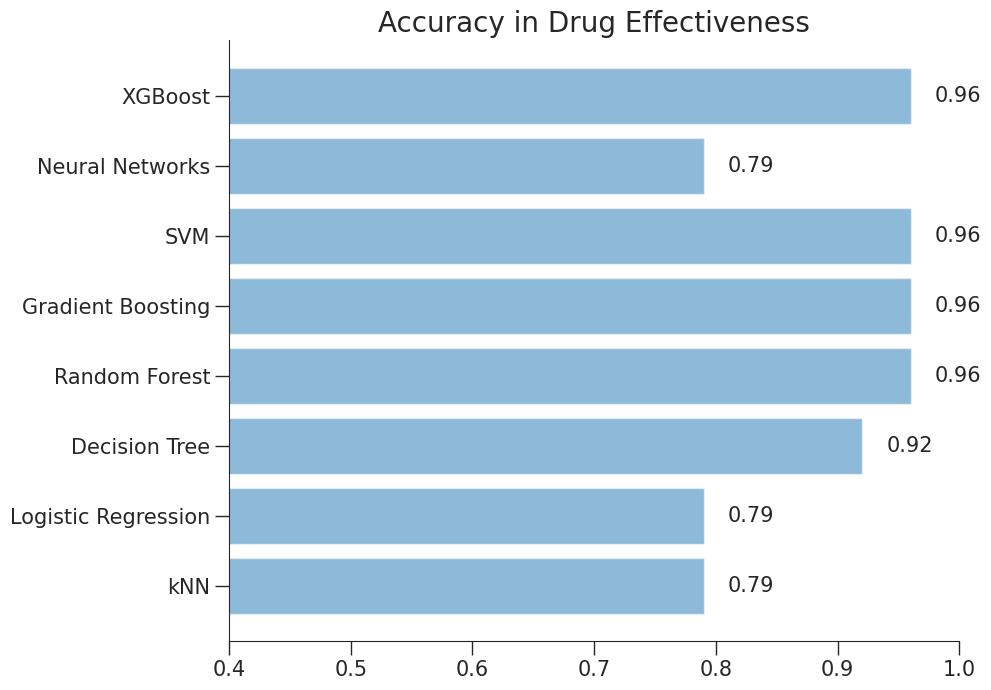

In [ ]:
plt.figure(figsize=(10,7))
drug_accuracy = [0.79, 0.79, 0.92, 0.96, 0.96, 0.96, 0.79, 0.96]
plt.barh(models,drug_accuracy,alpha=0.5)
# Menambahkan angka pada setiap bar
for index, value in enumerate(drug_accuracy):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center', fontsize=15)
plt.xlim([0.4,1.0])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy in Drug Effectiveness',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('drug-effectiveness.png',dpi=300)

In [ ]:
# Data akurasi untuk masing-masing model
non_effectiveness = {
    "XGBoost": 0.71,
    "Neural Networks": 0.57,
    "SVM": 0.57,
    "Gradient Boosting": 0.71,
    "Random Forest": 0.71,
    "Decision Tree": 0.86,
    "Logistic Regression": 0.71,
    "kNN": 0.86
}

effectiveness = {
    "XGBoost": 0.96,
    "Neural Networks": 0.79,
    "SVM": 0.96,
    "Gradient Boosting": 0.96,
    "Random Forest": 0.96,
    "Decision Tree": 0.92,
    "Logistic Regression": 0.79,
    "kNN": 0.79
}

# Menghitung rata-rata untuk setiap model
average_accuracy = {model: (non_effectiveness[model] + effectiveness[model]) / 2 for model in non_effectiveness}

# Menentukan model dengan rata-rata akurasi terbaik
best_model = max(average_accuracy, key=average_accuracy.get)

# Output hasil
print("Rata-rata akurasi setiap model:")
for model, avg in average_accuracy.items():
    print(f"{model}: {avg:.2f}")

print(f"\nModel terbaik berdasarkan rata-rata akurasi: {best_model} ({average_accuracy[best_model]:.2f})")


Rata-rata akurasi setiap model:
XGBoost: 0.83
Neural Networks: 0.68
SVM: 0.76
Gradient Boosting: 0.83
Random Forest: 0.83
Decision Tree: 0.89
Logistic Regression: 0.75
kNN: 0.82

Model terbaik berdasarkan rata-rata akurasi: Decision Tree (0.89)


Berdasarkan rata-rata akurasi setiap model:

1. **Model terbaik**:
   - **Decision Tree** memiliki rata-rata akurasi tertinggi yaitu 0.89, menjadikannya model terbaik dalam prediksi baik untuk data efektivitas obat maupun data non-efektivitas.

2. **Model dengan performa seimbang**:
   - **XGBoost**, **Gradient Boosting**, dan **Random Forest** memiliki rata-rata akurasi yang sama yaitu 0.83, menunjukkan performa yang baik dan konsisten di kedua kategori.

3. **Model dengan akurasi lebih rendah**:
   - **Neural Networks** (0.68) memiliki performa yang relatif lebih rendah dibandingkan model lain.
   - **Logistic Regression** (0.75) dan **kNN** (0.82) menunjukkan hasil yang lebih baik dibanding Neural Networks, tetapi masih di bawah Decision Tree.

4. **Kesimpulan**:
   - **Decision Tree** adalah model terbaik secara keseluruhan berdasarkan rata-rata akurasi, dengan performa unggul pada data non-efektivitas obat (0.86) dan cukup baik pada data efektivitas obat (0.92).
   - Model ensemble seperti **XGBoost**, **Gradient Boosting**, dan **Random Forest** dapat menjadi alternatif yang baik karena memiliki akurasi rata-rata tinggi dan stabilitas yang baik di kedua kategori.

# Kesimpulan

### Kesimpulan Proyek: Klasifikasi Bioaktivitas Inhibitor IDO1

1. **Klasifikasi Bioaktivitas**:
   - Proyek berhasil mengklasifikasikan senyawa sebagai aktif atau tidak aktif terhadap enzim IDO1 berdasarkan deskriptor molekuler. Model **Decision Tree** menunjukkan performa terbaik dengan rata-rata akurasi tertinggi sebesar 0.89, menjadikannya pilihan utama untuk tugas klasifikasi ini.

2. **Analisis Fitur**:
   - Analisis pentingnya fitur mengidentifikasi **Jumlah Donor Ikatan Hidrogen (NumHDonors)** dan **Berat Molekul (MW)** sebagai dua fitur yang paling signifikan dalam memprediksi bioaktivitas inhibitor IDO1. Fitur ini memiliki kontribusi dominan dalam hampir semua model pembelajaran mesin yang digunakan.
   - Uji Mann-Whitney mengonfirmasi bahwa fitur ini secara statistik signifikan dalam memisahkan senyawa aktif dari yang tidak aktif.

3. **Perbandingan Model**:
   - Model pembelajaran mesin dibandingkan berdasarkan akurasi dan F1-Macro. Hasil menunjukkan:
     - **Decision Tree** unggul dalam hal rata-rata akurasi (0.89) dengan kestabilan yang baik.
     - **XGBoost**, **Random Forest**, dan **Gradient Boosting** memberikan performa yang hampir sebanding (rata-rata akurasi 0.83), menunjukkan potensi mereka sebagai alternatif dengan stabilitas tinggi.
     - **SVM** dan **Neural Networks (MLP)** menunjukkan performa yang lebih rendah, dengan akurasi rata-rata masing-masing sebesar 0.76 dan 0.68.
   - Validasi silang 10-lipat memastikan keandalan hasil dan mengurangi bias evaluasi.

4. **Implikasi Klinis**:
   - Penemuan ini berkontribusi pada penelitian pengembangan obat, terutama dalam mengidentifikasi kandidat senyawa aktif sebagai inhibitor IDO1 yang berpotensi digunakan untuk pengobatan kanker dan penyakit autoimun.
   - Fitur signifikan yang teridentifikasi dapat menjadi panduan dalam merancang molekul baru dengan bioaktivitas tinggi terhadap IDO1.